| **Inicio** | **atrás 9** | **Siguiente 11** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./09_Matematicas_para_el_aprendizaje_automatico_Calculo_multivariante.ipynb)| [⏩](./11_Matematicas_para_el_aprendizaje_automatico_Calculo_multivariante.ipynb)|

# **10. Matemáticas para el aprendizaje automático: Cálculo multivariante**

## **10.1 Introducción a la optimización**

Si queremos encontrar los puntos mínimo y máximo de una función, podemos utilizar el cálculo multivariante para ello, digamos que para optimizar los parámetros (el espacio) de una función que se ajuste a unos datos. Primero haremos esto en una dimensión y utilizaremos el gradiente para que nos dé estimaciones de dónde están los puntos cero de esa función, y luego iteraremos con el método Newton-Raphson. Después extenderemos la idea a múltiples dimensiones encontrando el vector gradiente, Grad, que es el vector del jacobiano. Esto nos permitirá entonces encontrar el camino hacia los mínimos y los máximos en lo que se denomina el método de descenso del gradiente. Luego nos tomaremos un momento para utilizar Grad para encontrar los mínimos y máximos a lo largo de una restricción en el espacio, que es el método de los multiplicadores de Lagrange.

### **10.1.1 Descenso de gradiente**

El **descenso de gradiente** es un algoritmo de optimización muy utilizado para encontrar el mínimo de una función, generalmente en el contexto de aprendizaje automático y optimización matemática. Este método es especialmente útil para problemas donde se desea minimizar una función de coste o pérdida que depende de una serie de parámetros.

**Conceptos Básicos del Descenso de Gradiente**

El descenso de gradiente se basa en la observación de que si la función de coste $(f)$ es diferenciable en un punto $(\mathbf{x})$, la dirección del gradiente de $(f)$ en $(\mathbf{x})$, denotado como $\nabla f(\mathbf{x})$, apunta en la dirección de mayor incremento de $(f)$. Por lo tanto, para minimizar $(f)$, deberíamos mover $(\mathbf{x})$ en la dirección opuesta al gradiente.

**Formulación Matemática**

Dado un punto inicial $(\mathbf{x}_0)$ y una función $f(\mathbf{x})$ que queremos minimizar, la actualización de $(\mathbf{x})$ en cada iteración del descenso de gradiente se realiza según la regla:

$\mathbf{x}_{n+1} = \mathbf{x}_n - \alpha \nabla f(\mathbf{x}_n)$

donde $(\alpha)$ es la tasa de aprendizaje, que determina el tamaño del paso en la dirección opuesta al gradiente.

**Ejemplo Práctico: Minimización de una Función Cuadrática**

Supongamos que queremos minimizar la función $f(x) = x^2$.

**Derivada de la Función**

La derivada de $(f)$, que es necesaria para calcular el gradiente, es $f'(x) = 2x$.

**Código Python para Descenso de Gradiente**

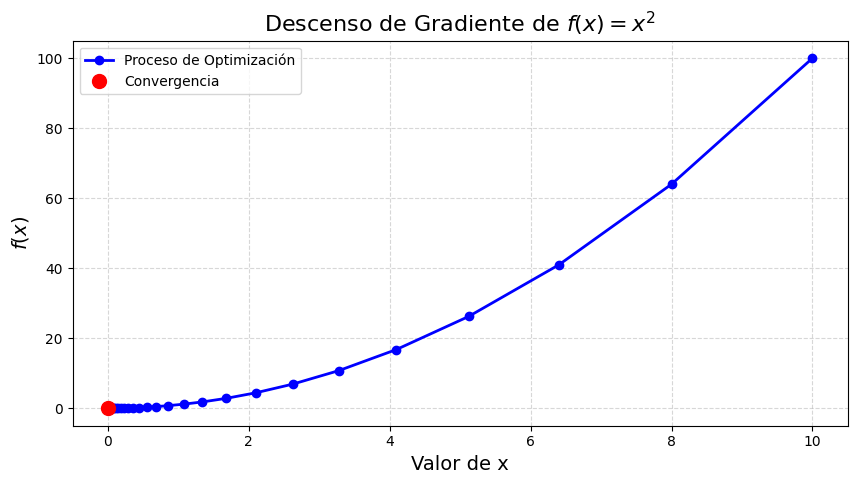

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(derivative_func, initial_x, learning_rate=0.1, precision=0.0001, max_iters=100):
    x = initial_x
    x_history = [x]
    for _ in range(max_iters):
        grad = derivative_func(x)
        x = x - learning_rate * grad
        x_history.append(x)
        if abs(grad) < precision:
            break
    return x, np.array(x_history)

# Derivada de f(x) = x^2
def derivative(x):
    return 2 * x

# Aplicar descenso de gradiente
opt_x, x_history = gradient_descent(derivative, initial_x=10, learning_rate=0.1)

# Graficar el proceso de optimización
plt.figure(figsize=(10, 5))

# Proceso de optimización
plt.plot(x_history, x_history**2, 'o-', label='Proceso de Optimización', color='blue', linewidth=2)

# Punto de convergencia
plt.plot(opt_x, opt_x**2, 'ro', label='Convergencia', markersize=10)

# Personalización de la gráfica
plt.title('Descenso de Gradiente de $f(x) = x^2$', fontsize=16)
plt.xlabel('Valor de x', fontsize=14)
plt.ylabel('$f(x)$', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**Visualización y Discusión**

El gráfico muestra cómo el valor de $(x)$ se actualiza iterativamente, moviéndose hacia el mínimo de la función $(x^2)$. Con cada iteración, $(x)$ se acerca al punto mínimo $x = 0$, demostrando la eficacia del descenso de gradiente en este caso sencillo.

**Aplicaciones del Descenso de Gradiente**

- **Aprendizaje Automático**: Utilizado para la optimización de funciones de coste en la regresión, clasificación y redes neuronales.

- **Investigación Operativa**: Aplicado en la optimización de recursos y la toma de decisiones.

- **Ingeniería y Física**: Usado para resolver problemas de minimización de energía y otros cálculos de optimización.

**Conclusión**

El descenso de gradiente es un método de optimización fundamental y ampliamente utilizado que permite resolver problemas complejos de minimización. Su simplicidad y eficacia lo convierten en una herramienta de primera elección en muchos campos, aunque es importante manejar adecuadamente aspectos como la elección de la tasa de aprendizaje y el tratamiento de funciones no convexas para evitar convergencias a mínimos locales no óptimos.

### **10.1.2 Optimización restringida**

La **optimización restringida** implica encontrar los valores máximos o mínimos de una función sujeta a una o más restricciones. Estas restricciones pueden ser igualdades o desigualdades que el conjunto de soluciones factibles debe satisfacer. Este tipo de optimización es crucial en muchos campos, como la ingeniería, la economía, la administración de recursos y más, donde las decisiones óptimas necesitan ser tomadas dentro de límites específicos.

**Conceptos Básicos de la Optimización Restringida**

En la optimización restringida, buscamos minimizar o maximizar una función objetivo $f(\mathbf{x})$, donde $\mathbf{x} = (x_1, x_2, \dots, x_n)$ sujeta a una o más restricciones que pueden ser formuladas como:

- **Restricciones de Igualdad**: $g_i(\mathbf{x}) = 0$

- **Restricciones de Desigualdad**: $(h_j(\mathbf{x}) \leq 0)$

**Método de los Multiplicadores de Lagrange**

Una técnica común para resolver problemas de optimización restringida con restricciones de igualdad es el método de los multiplicadores de Lagrange. Este método introduce variables adicionales, llamadas multiplicadores de Lagrange, para cada restricción de igualdad, y construye la función Lagrangiana $(L)$:

$L(\mathbf{x}, \lambda) = f(\mathbf{x}) + \sum \lambda_i g_i(\mathbf{x})$

donde $(\lambda_i)$ son los multiplicadores de Lagrange asociados a las restricciones $g_i(\mathbf{x}) = 0$.

**Ejemplo Práctico: Optimización con Restricciones**

Supongamos que queremos minimizar la función $f(x, y) = x^2 + y^2$ sujeta a la restricción $x + y = 1$.

**Formulación Lagrangiana**

La función Lagrangiana para este problema es:

$L(x, y, \lambda) = x^2 + y^2 + \lambda (x + y - 1)$

**Cálculo de los Puntos Críticos**

Las condiciones necesarias para un extremo son que las derivadas parciales de $(L)$ respecto a $(x)$, $(y)$, y $(\lambda)$ sean cero:

$\frac{\partial L}{\partial x} = 2x + \lambda = 0$

$\frac{\partial L}{\partial y} = 2y + \lambda = 0$

$\frac{\partial L}{\partial \lambda} = x + y - 1 = 0$

Resolviendo este sistema de ecuaciones, encontramos $(x = y = 0.5)$ y $(\lambda = -1)$.

**Código Python y Visualización**

Aquí mostramos cómo implementar y visualizar este ejemplo en Python:

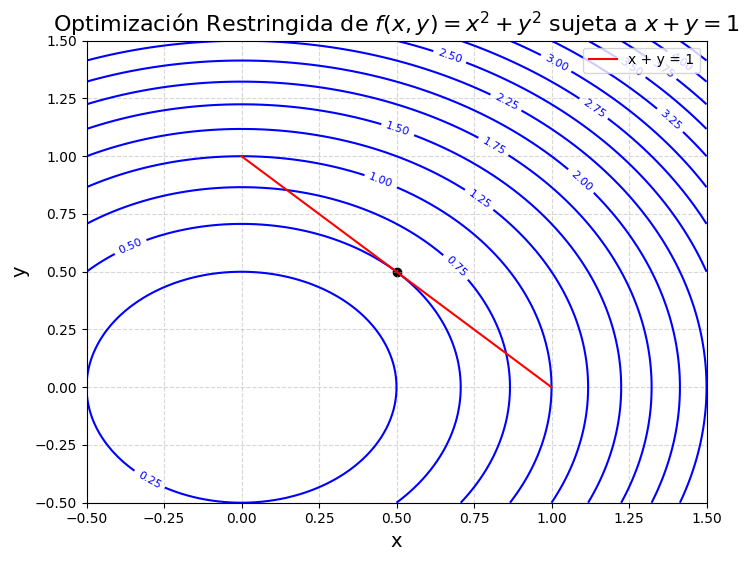

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def lagrange_function(x, y, lambda_):
    return x**2 + y**2 + lambda_ * (x + y - 1)

# Resolución del sistema de ecuaciones
from scipy.optimize import fsolve

def equations(vars):
    x, y, lambda_ = vars
    eq1 = 2*x + lambda_
    eq2 = 2*y + lambda_
    eq3 = x + y - 1
    return [eq1, eq2, eq3]

solution = fsolve(equations, [0, 0, 0])
x, y, lambda_ = solution

# Crear gráfico de contorno de la función objetivo con la restricción
X, Y = np.meshgrid(np.linspace(-0.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
Z = X**2 + Y**2
plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, levels=20, colors='blue')  # Cambié el color de las líneas de contorno a azul
plt.plot([0, 1], [1, 0], 'r-', label='x + y = 1')  # Restricción
plt.scatter([x], [y], color='black')  # Solución
plt.clabel(contour, inline=True, fontsize=8)
plt.title('Optimización Restringida de $f(x, y) = x^2 + y^2$ sujeta a $x + y = 1$', fontsize=16)  # Aumenté el tamaño de fuente del título
plt.xlabel('x', fontsize=14)  # Aumenté el tamaño de fuente del eje x
plt.ylabel('y', fontsize=14)  # Aumenté el tamaño de fuente del eje y
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)  # Cambié el estilo de la cuadrícula
plt.show()

**Conclusión**

La optimización restringida es esencial para encontrar soluciones óptimas dentro de un conjunto de límites y restricciones específicos. El método de los multiplicadores de Lagrange es solo uno de varios enfoques para abordar estos problemas, siendo particularmente útil cuando las restricciones son igualdades. Esta metodología permite a investigadores y profesionales abordar una amplia gama de problemas prácticos donde las restricciones son una parte crítica del modelado del problema.

### **10.1.3 Comprobación de Newton-Raphson**

El **método de Newton-Raphson**, también conocido como el método de Newton, es un algoritmo eficaz y poderoso para encontrar aproximaciones de las raíces (o ceros) de una función real. Este método utiliza la derivada de la función para iterativamente mejorar las estimaciones de las raíces.

**Fundamentos del Método de Newton-Raphson**

El método de Newton-Raphson parte de un supuesto básico sobre la función $f(x)$: debe ser diferenciable en el dominio de interés. El algoritmo comienza con un valor inicial "adivinado" $(x_0)$ que está idealmente cerca de la raíz buscada. La fórmula para iterar hacia la raíz es:

$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$

donde:

- $(x_n)$ es la estimación actual de la raíz.

- $f'(x)$ es la derivada de $(f)$ en $(x)$.

- $(x_{n+1})$ es la nueva estimación de la raíz.

**Ejemplo Práctico: Encontrar la Raíz de $f(x) = x^2 - 2$**

Supongamos que queremos encontrar la raíz cuadrada de 2, que es la solución a la ecuación $(x^2 - 2 = 0)$.

**Derivada de la Función**

La derivada de $f(x) = x^2 - 2$ es $f'(x) = 2x$.

**Código Python para el Método de Newton-Raphson**

A continuación, se proporciona un ejemplo de implementación en Python para encontrar la raíz de $f(x) = x^2 - 2$ utilizando el método de Newton-Raphson.

La raíz encontrada de x^2 - 2 es aproximadamente: 1.4142135623730951


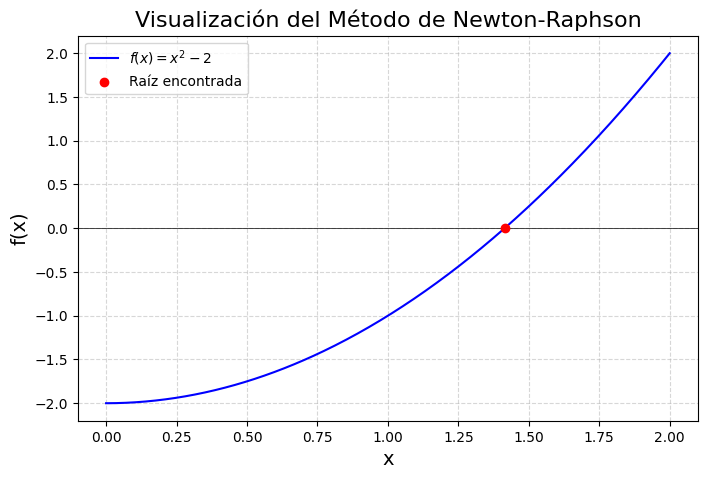

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def newton_raphson(f, df, x0, tol=1e-10, max_iter=1000):
    """Implementa el método de Newton-Raphson para encontrar la raíz de f dado un punto inicial x0."""
    x = x0
    for _ in range(max_iter):
        x_new = x - f(x) / df(x)
        if abs(x_new - x) < tol:  # Convergencia
            return x_new
        x = x_new
    return x  # Retorna la aproximación tras max_iter iteraciones si no se alcanza la convergencia

# Definir la función y su derivada
def f(x):
    return x**2 - 2

def df(x):
    return 2*x

# Aplicar el método de Newton-Raphson
initial_guess = 1.5
root = newton_raphson(f, df, initial_guess)

print(f"La raíz encontrada de x^2 - 2 es aproximadamente: {root}")

# Visualización de la función y la raíz encontrada
x_values = np.linspace(0, 2, 400)
y_values = f(x_values)

plt.figure(figsize=(8, 5))

# Función f(x)
plt.plot(x_values, y_values, label='$f(x) = x^2 - 2$', color='blue')

# Línea horizontal en y=0
plt.axhline(0, color='black',linewidth=0.5)

# Punto de la raíz encontrada
plt.scatter([root], [f(root)], color='red', zorder=5, label='Raíz encontrada')

# Personalización de la gráfica
plt.title('Visualización del Método de Newton-Raphson', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x)', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**Discusión**

El método de Newton-Raphson es generalmente muy rápido y eficiente en términos de convergencia, especialmente cerca de la raíz y cuando la derivada no es cero. Sin embargo, puede fallar o divergir si la derivada en la raíz es cero o si el valor inicial está muy lejos de cualquier raíz.

**Conclusión**

El método de Newton-Raphson es una herramienta poderosa en cálculo numérico para encontrar raíces de funciones. Su eficiencia y rapidez lo hacen adecuado para aplicaciones en ciencias e ingeniería, aunque es crucial elegir un buen valor inicial y asegurarse de que la función cumpla las condiciones necesarias para la convergencia del método.

### **10.1.4 Escenarios de optimización**

Los **escenarios de optimización** se refieren a las diversas situaciones y modelos en los que los métodos de optimización son aplicados para encontrar las mejores soluciones posibles bajo un conjunto dado de restricciones y criterios. Estos escenarios pueden variar ampliamente dependiendo del campo de aplicación, como la economía, la ingeniería, la informática y las ciencias naturales. Cada escenario presenta desafíos únicos que pueden requerir diferentes métodos de optimización para ser resueltos eficazmente.

**Tipos de Escenarios de Optimización**

1. **Optimización sin Restricciones**: Buscar el mínimo o máximo de una función sin restricciones adicionales sobre las variables. Ejemplo típico: minimización de una función de coste en machine learning.

2. **Optimización con Restricciones**: Involucra restricciones que el conjunto de soluciones factibles debe satisfacer. Estas restricciones pueden ser igualdades o desigualdades.

3. **Optimización Lineal**: Las funciones objetivo y las restricciones son lineales. Muy común en la administración de recursos y la planificación de operaciones.

4. **Optimización No Lineal**: Cuando la función objetivo o alguna de las restricciones es no lineal. Común en la ingeniería para el diseño bajo restricciones complejas.

5. **Programación Entera**: Las variables de decisión están restringidas a valores enteros. Útil en problemas de programación de horarios y rutas donde las variables deben ser discretas.

6. **Optimización Multiobjetivo**: Involucra más de una función objetivo a optimizar simultáneamente, a menudo con objetivos en conflicto.

**Ejemplo Práctico: Optimización Lineal**

Consideremos un problema de optimización lineal típico en el que una empresa desea minimizar los costos de producción sujetos a restricciones de capacidad.

**Problema**

La empresa produce dos productos $(P_1)$ y $(P_2)$. Los costos de producción por unidad de $(P_1)$ y $(P_2)$ son 20 y 30 unidades monetarias, respectivamente. Las capacidades de producción para $(P_1)$ y $(P_2)$ no deben exceder 100 y 150 unidades, respectivamente, y la empresa tiene un presupuesto máximo de producción de 4000 unidades monetarias.

**Formulación Matemática**

Minimizar:

$20x_1 + 30x_2$

Sujeto a:

\begin{align*}
x_1 & \leq 100 \\
x_2 & \leq 150 \\
20x_1 + 30x_2 & \leq 4000 \\
x_1, x_2 & \geq 0
\end{align*}

**Código Python y Visualización Usando `SciPy`**

In [4]:
from scipy.optimize import linprog

# Coeficientes de la función objetivo
c = [20, 30]  # Costo de producción de P1 y P2

# Matriz de coeficientes de las restricciones de desigualdad
A = [[1, 0], [0, 1], [20, 30]]

# Lado derecho de las restricciones de desigualdad
b = [100, 150, 4000]

# Límites para cada variable
x0_bounds = (0, None)  # P1 puede producirse desde 0 hasta infinito teóricamente
x1_bounds = (0, None)  # P2 igual

# Resolviendo el problema de optimización
res = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds], method='highs')

print("Status:", res.message)
print("Costo mínimo:", res.fun)
print("Producción de P1 y P2:", res.x)

Status: Optimization terminated successfully. (HiGHS Status 7: Optimal)
Costo mínimo: 0.0
Producción de P1 y P2: [0. 0.]


**Conclusión**

Los escenarios de optimización son variados y complejos, cada uno con sus desafíos y métodos de resolución adecuados. La elección del método de optimización depende críticamente del tipo de función objetivo, la naturaleza de las restricciones, y el contexto del problema. La optimización permite a las organizaciones y a los investigadores tomar decisiones racionales y fundamentadas que maximizan o minimizan los resultados deseados dentro de los límites de los recursos disponibles o las capacidades técnicas.

### **10.1.5 Newton-Raphson en una dimensión**

El **método de Newton-Raphson** en una dimensión, también conocido simplemente como método de Newton, es un algoritmo eficiente y potente para encontrar las raíces, o ceros, de una función real diferenciable. Este método utiliza la derivada de la función para encontrar rápidamente soluciones aproximadas, convergiendo bajo condiciones ideales en muy pocos pasos.

**Conceptos Básicos del Método de Newton-Raphson**

El método de Newton se basa en la idea de que la tangente a la curva de la función en un punto dado proporciona una buena aproximación a la próxima posición donde la función podría cruzar el eje x, asumiendo que la función es suficientemente suave y la primera estimación está cerca de la verdadera raíz.

**Fórmula del Método de Newton**

Dado un punto inicial $(x_0)$, la serie de aproximaciones $(x_1, x_2, x_3, \ldots)$ es generada por la iteración siguiente:

$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$

donde:

- $f(x)$ es la función cuya raíz se desea encontrar.

- $f'(x)$ es la derivada de $(f)$.

Esta fórmula se deriva de la ecuación de la línea tangente a la función en $(x_n)$, resuelta para el punto donde la línea tangente cruza el eje x.

**Ejemplo Práctico: Encontrando Raíces de $f(x) = x^2 - 2$**

Vamos a usar el método de Newton-Raphson para encontrar la raíz cuadrada de 2, es decir, solucionar $(x^2 - 2 = 0)$.

**Derivada de la Función**

Para $f(x) = x^2 - 2$, la derivada es $f'(x) = 2x$.

**Implementación en Python y Visualización**

Convergencia alcanzada después de 5 iteraciones.


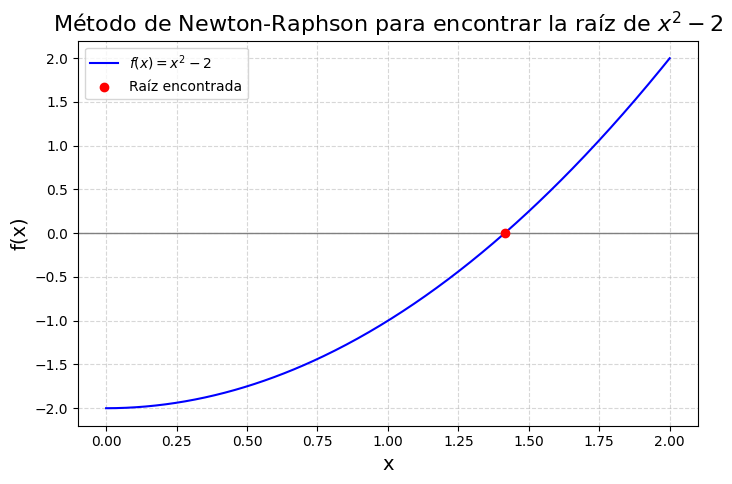

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def newton_raphson(func, deriv, initial_guess, tolerance=1e-10, max_iterations=100):
    x = initial_guess
    for i in range(max_iterations):
        x_new = x - func(x) / deriv(x)
        if abs(x_new - x) < tolerance:
            print(f"Convergencia alcanzada después de {i+1} iteraciones.")
            return x_new
        x = x_new
    raise RuntimeError(f"No se logró convergencia después de {max_iterations} iteraciones")

def func(x):
    return x**2 - 2

def deriv(x):
    return 2*x

# Configuración inicial
initial_guess = 1.0

# Aplicación del método de Newton-Raphson
root = newton_raphson(func, deriv, initial_guess)

# Visualización
x_values = np.linspace(0, 2, 400)
y_values = func(x_values)
plt.figure(figsize=(8, 5))

# Función f(x)
plt.plot(x_values, y_values, label='$f(x) = x^2 - 2$', color='blue')

# Línea horizontal en y=0
plt.axhline(0, color='gray', lw=1)

# Punto de la raíz encontrada
plt.scatter(root, func(root), color='red', zorder=5, label='Raíz encontrada')

# Personalización de la gráfica
plt.title('Método de Newton-Raphson para encontrar la raíz de $x^2 - 2$', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x)', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**Discusión**

El gráfico generado muestra cómo el método de Newton-Raphson aproxima la raíz de la función. El punto rojo indica la raíz encontrada, cerca de $(\sqrt{2})$, que es aproximadamente 1.414. Este método es especialmente potente debido a su rápida convergencia, particularmente cuando el punto inicial está cerca de la raíz verdadera.

**Conclusión**

El método de Newton-Raphson en una dimensión es una técnica fundamental en cálculo numérico para encontrar rápidamente las raíces de funciones. Su eficiencia lo hace ideal para muchas aplicaciones prácticas en ciencia e ingeniería. Sin embargo, su éxito depende de la elección adecuada del punto inicial y de que la función no tenga derivadas cercanas a cero, lo cual puede complicar la convergencia.

### **10.1.6 Multiplicadores de Lagrange**

Los **multiplicadores de Lagrange** son una técnica matemática utilizada para encontrar los máximos y mínimos de una función sujeta a restricciones. Es una herramienta poderosa en el campo de la optimización restringida, especialmente útil cuando las restricciones pueden expresarse como ecuaciones de igualdad.

**Conceptos Básicos de los Multiplicadores de Lagrange**

El método de los multiplicadores de Lagrange permite convertir un problema de optimización con restricciones en un problema sin restricciones mediante la introducción de una o más variables auxiliares, conocidas como multiplicadores de Lagrange.

**Formulación del Método**

Consideremos una función objetivo $f(x, y, \dots)$ que queremos maximizar o minimizar sujeta a una restricción de igualdad $g(x, y, \dots) = 0$. La idea es formular una nueva función, llamada **función Lagrangiana**, definida como:

$L(x, y, \dots, \lambda) = f(x, y, \dots) + \lambda (g(x, y, \dots) - 0)$

donde $(\lambda)$ es el multiplicador de Lagrange. El objetivo es entonces encontrar los puntos estacionarios de $(L)$, donde las derivadas parciales de $(L)$ con respecto a todas las variables, incluyendo $(\lambda)$, son cero.

**Ejemplo Práctico: Optimización con una Restricción**

Supongamos que queremos maximizar la función $f(x, y) = xy$, sujeta a la restricción de que la suma de $(x)$ y $(y)$ debe ser igual a 10 es decir, $(x + y = 10)$.

**Construcción de la Función Lagrangiana**

La función Lagrangiana para este problema es:

$L(x, y, \lambda) = xy + \lambda (x + y - 10)$

**Derivadas Parciales**

Para encontrar los extremos, necesitamos calcular las derivadas parciales y establecerlas a cero:

$\frac{\partial L}{\partial x} = y + \lambda = 0$

$\frac{\partial L}{\partial y} = x + \lambda = 0$

$\frac{\partial L}{\partial \lambda} = x + y - 10 = 0$

**Resolución del Sistema de Ecuaciones**

Resolviendo este sistema, encontramos que $(\lambda = -5)$, $(x = 5)$, y $(y = 5)$.

**Código Python y Visualización**

A continuación, se proporciona un código Python para ilustrar este ejemplo:

Optimum at x = 5.0, y = 4.999999999999999


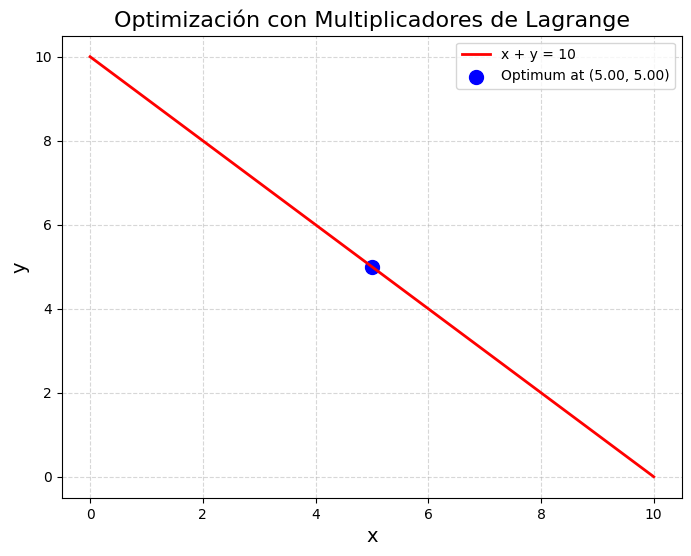

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Definición de la función objetivo y la restricción
def objective(vars):
    x, y = vars
    return -x * y  # Negativo porque minimize busca minimizar

def constraint(vars):
    x, y = vars
    return x + y - 10

# Restricciones y optimización
cons = {'type': 'eq', 'fun': constraint}
initial_guess = [1, 1]
result = minimize(objective, initial_guess, constraints=cons)

x_opt, y_opt = result.x
print(f"Optimum at x = {x_opt}, y = {y_opt}")

# Visualización de la función y la restricción
fig, ax = plt.subplots(figsize=(8, 6))
x = np.linspace(0, 10, 400)
y = 10 - x
ax.plot(x, y, 'r-', lw=2, label='x + y = 10')
ax.scatter(x_opt, y_opt, color='blue', s=100, label=f'Optimum at ({x_opt:.2f}, {y_opt:.2f})')

# Personalización de la gráfica
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_title('Optimización con Multiplicadores de Lagrange', fontsize=16)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)
plt.show()

**Conclusión**

Los multiplicadores de Lagrange son una herramienta esencial en la optimización, permitiendo resolver problemas complejos donde se necesitan considerar restricciones específicas. Su capacidad para convertir problemas restringidos en problemas sin restricciones simplifica el proceso de optimización y abre un amplio campo de aplicaciones prácticas en ingeniería, economía y ciencia.

### **10.1.7 Descenso de pendientes en un foso de arena**

El término "descenso de pendientes en un foso de arena" no es un término comúnmente reconocido en matemáticas o física, pero parece ser una metáfora para describir el proceso de descenso de gradiente en un contexto visual y tangible. Imaginemos que este proceso es como una bola rodando hacia abajo en un foso de arena, donde la bola siempre se mueve en la dirección de la pendiente más empinada hasta alcanzar el punto más bajo, que sería un mínimo local o global. Esta analogía puede ser útil para explicar cómo funciona el algoritmo de descenso de gradiente en la optimización matemática.

**Conceptos Básicos del Descenso de Gradiente**

El **descenso de gradiente** es un algoritmo de optimización que se utiliza para encontrar el mínimo local de una función diferenciable. El concepto es simple: se toma la derivada (el gradiente) de la función en un punto dado y se avanza en la dirección que lleva más rápidamente hacia el punto más bajo, es decir, en la dirección opuesta al gradiente.

**Fórmula del Descenso de Gradiente**

Dada una función $f(\mathbf{x})$ y un punto inicial $(\mathbf{x}_0)$, la actualización de $(\mathbf{x})$ se realiza usando:

$\mathbf{x}_{n+1} = \mathbf{x}_n - \alpha \nabla f(\mathbf{x}_n)$

donde:

- $(\mathbf{x}_n)$ es la posición actual.

- $(\alpha)$ es la tasa de aprendizaje, que determina el tamaño del paso.

- $(\nabla f(\mathbf{x}_n))$ es el gradiente de $(f)$ en $(\mathbf{x}_n)$.

**Ejemplo Práctico: Descenso de Gradiente en un Paisaje de "Foso de Arena"**

Para hacer esto más tangible, vamos a imaginar que estamos minimizando la función $f(x, y) = x^2 + y^2$, que es un paraboloide simple. Este ejemplo ilustra cómo la "bola" (el punto de evaluación) se mueve hacia el punto más bajo del "foso de arena" (el mínimo de la función).

**Código Python para Visualización**

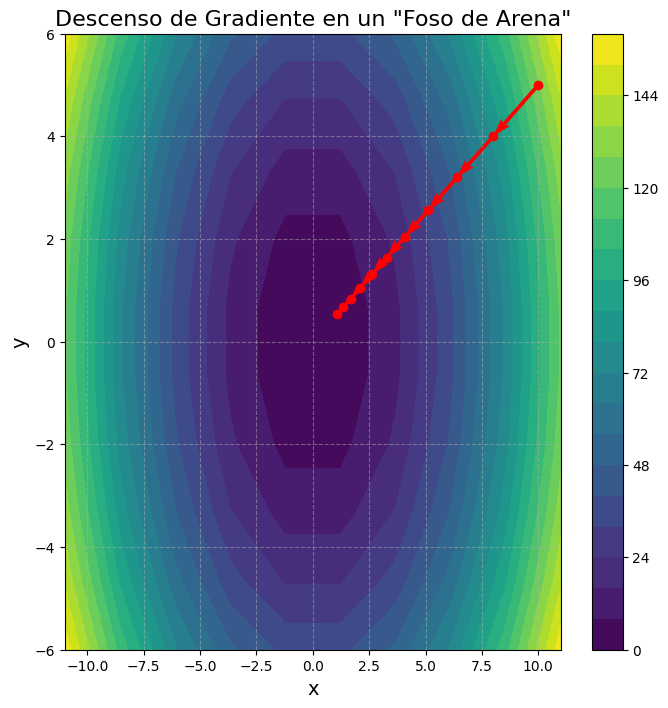

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def gradient(x, y):
    return np.array([2*x, 2*y])

def gradient_descent(starting_point, learning_rate, num_steps):
    points = [starting_point]
    for _ in range(num_steps):
        grad = gradient(*points[-1])
        new_point = points[-1] - learning_rate * grad
        points.append(new_point)
    return np.array(points)

# Configuración inicial
starting_point = np.array([10, 5])  # Punto inicial en el "foso de arena"
learning_rate = 0.1                 # Tamaño del paso
num_steps = 10                      # Número de pasos

# Aplicación del descenso de gradiente
points = gradient_descent(starting_point, learning_rate, num_steps)

# Crear el campo de pendiente para visualizar
x = np.linspace(-11, 11, 10)
y = np.linspace(-6, 6, 10)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2
fig, ax = plt.subplots(figsize=(8, 8))

# Contorno de la función de pérdida
contour = ax.contourf(X, Y, Z, levels=20, cmap='viridis')

# Flechas de descenso de gradiente
ax.quiver(points[:-1, 0], points[:-1, 1], points[1:, 0] - points[:-1, 0], points[1:, 1] - points[:-1, 1], scale_units='xy', angles='xy', scale=1, color='red')

# Trayectoria de descenso de gradiente
ax.plot(points[:, 0], points[:, 1], 'ro-')

# Personalización de la gráfica
ax.set_title('Descenso de Gradiente en un "Foso de Arena"', fontsize=16)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
plt.colorbar(contour)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**Conclusión**

Este código y visualización muestran cómo el algoritmo de descenso de gradiente, representado aquí como una bola que desciende en un foso de arena, avanza paso a paso hacia el mínimo de la función. La elección de la tasa de aprendizaje y del punto de inicio puede afectar significativamente la eficacia y eficiencia del proceso de optimización, al igual que las características del terreno afectarían la trayectoria de una bola en un paisaje real. Este método es fundamental en muchos campos, particularmente en aprendizaje automático para la optimización de funciones de coste.

| **Inicio** | **atrás 9** | **Siguiente 11** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./09_Matematicas_para_el_aprendizaje_automatico_Calculo_multivariante.ipynb)| [⏩](./11_Matematicas_para_el_aprendizaje_automatico_Calculo_multivariante.ipynb)|